In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('fuel_econ.csv')
# Load dataset
numeric_data = data.select_dtypes(include=[np.number]).values

# Compute mean and standard deviation
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0, ddof=0)

# Standardize the data
standardized_data = (numeric_data - mean) / std_dev

# Display first 5 rows
print(standardized_data[:5])


In [2]:

# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)  # Set rowvar=False to compute covariance between features

# Display the covariance matrix
print(cov_matrix)

[[ 1.00025458  0.98591866 -0.06011148 -0.07468488 -0.00657025 -0.02195656
   0.09182316  0.09124849  0.0906161   0.09538375  0.09382686 -0.09974229
  -0.1279056  -0.12235207]
 [ 0.98591866  1.00025458 -0.05532701 -0.07044161  0.00623397 -0.03365174
   0.06806739  0.06675938  0.07330836  0.07766039  0.07201181 -0.0811853
  -0.1498676  -0.14517775]
 [-0.06011148 -0.05532701  1.00025458  0.93411019  0.24763384 -0.00426546
  -0.69327904 -0.66619842 -0.76646982 -0.77169964 -0.73821112  0.84848979
  -0.78405759 -0.78201448]
 [-0.07468488 -0.07044161  0.93411019  1.00025458  0.2594021   0.02207729
  -0.71366074 -0.6863403  -0.78418374 -0.78865771 -0.75859024  0.85559254
  -0.7936343  -0.79141752]
 [-0.00657025  0.00623397  0.24763384  0.2594021   1.00025458 -0.66581137
  -0.27817962 -0.27261515 -0.29688365 -0.29858023 -0.29095711  0.28727323
  -0.2961638  -0.29323103]
 [-0.02195656 -0.03365174 -0.00426546  0.02207729 -0.66581137  1.00025458
   0.03519659  0.03787859  0.07497068  0.07746161  0

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]

Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803619e-02  5.690

In [4]:
# Step 5: Sort Principal Components

# Get sorted indices of eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors accordingly
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Columns are eigenvectors

# Display sorted eigenvectors
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues:
 [8.95720924e+00 2.06777956e+00 1.59364217e+00 6.70587666e-01
 3.01684118e-01 1.61017548e-01 1.25550471e-01 6.40205207e-02
 3.23528963e-02 1.36962433e-02 9.24627112e-03 4.24637785e-03
 2.14358185e-03 3.87485886e-04]

Sorted Eigenvectors:
 [[ 1.89952516e-02 -6.87675276e-01  7.65365183e-02  1.83729680e-02
  -1.42115022e-02  7.02789695e-02  1.14861126e-01  4.01097554e-03
  -1.15143583e-01 -6.95538857e-01 -6.83326435e-02  2.10633586e-02
  -7.10578367e-03  6.07618642e-04]
 [ 1.24694065e-02 -6.89503292e-01  6.88439505e-02 -9.43831862e-03
  -1.35600088e-02  3.37955333e-02  8.53170135e-02 -7.51768613e-03
  -5.48830131e-02  7.10425085e-01  5.58369479e-02 -9.48384475e-03
  -3.26885432e-04 -3.98397374e-03]
 [-2.81632694e-01  1.98550575e-02  5.61398643e-02  6.00933196e-01
   9.71151716e-02 -7.09369930e-02  2.53817629e-01 -6.79764243e-01
   1.19688616e-01  2.20121563e-03  1.99493288e-02  1.60174402e-02
   8.04028190e-03 -8.90395340e-04]
 [-2.86142593e-01  3.10582044e-02  6.39803

In [5]:
# Step 6: Project Data onto Principal Components

num_components = 2  # Choose the number of principal components to retain (e.g., 2 for visualization)

# Select the top 'num_components' eigenvectors
top_eigenvectors = sorted_eigenvectors[:, :num_components]

# Project the standardized data onto the new feature space
reduced_data = np.dot(standardized_data, top_eigenvectors)

# Display the first 5 rows of reduced data
print(reduced_data[:5])


[[-3.19146207  1.98769416]
 [ 0.38752701  1.99194578]
 [-2.09148498  2.03743394]
 [-2.37914076  2.06380156]
 [ 2.5972681   2.50420206]]


In [6]:
# Step 7: Output the Reduced Data

# Display the shape of the reduced data
print(f'Reduced Data Shape: {reduced_data.shape}')

# Display the first few rows of the reduced data
print(reduced_data[:5])


Reduced Data Shape: (3929, 2)
[[-3.19146207  1.98769416]
 [ 0.38752701  1.99194578]
 [-2.09148498  2.03743394]
 [-2.37914076  2.06380156]
 [ 2.5972681   2.50420206]]


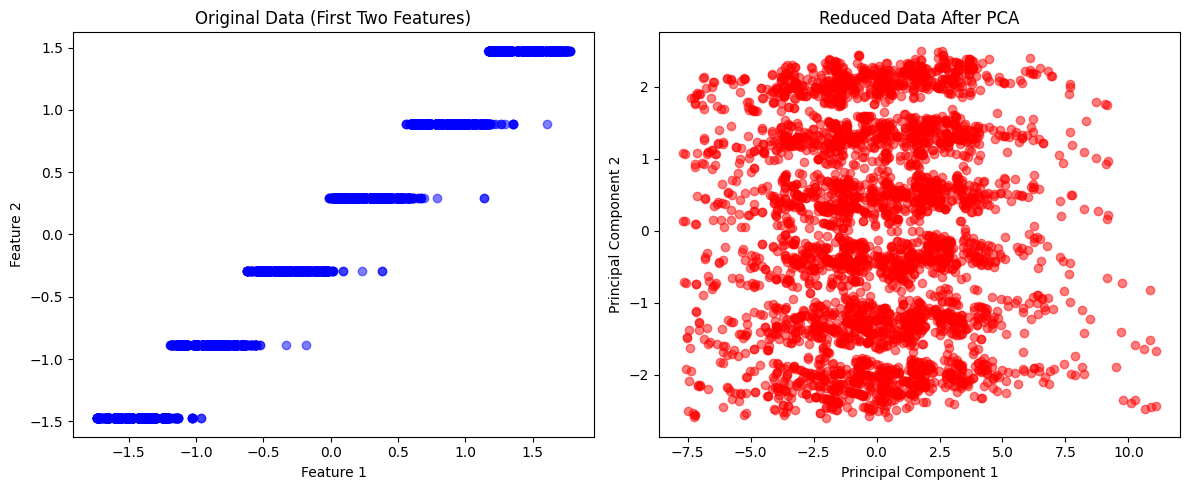

In [7]:
import matplotlib.pyplot as plt

# Step 8: Visualize Before and After PCA

# Plot original data (using first two features for simplicity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, color='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, color='red')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Reduced Data After PCA")

plt.tight_layout()
plt.show()
